# Project Title: Telecom Churn Analysis
## Introduction
### Import important libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import plotly.express as px
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")


## Import and pre_processing the data

In [2]:
df=pd.read_csv("telecome_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dropna(inplace=True)

# Drop columns with missing values
df.dropna(axis=1, inplace=True)

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
if df.duplicated().sum() > 0:
        print("Warning: Duplicates found.")

In [9]:
df["customerID"].nunique()

7043

In [10]:
df = df.drop(columns=['customerID'])

In [11]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
encoder = OneHotEncoder(sparse_output=False)
df['Churn'] = encoder.fit_transform(df[['Churn']])

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,1.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,1.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,1.0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1.0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0.0


### Data Exploration
### We will perform exploratory data analysis (EDA) to understand the dataset.


In [14]:
fig = px.bar(df, x="Partner", y="PhoneService",color="PhoneService", title="Sample Bar Chart")
fig.show()

In [15]:
counts = df['InternetService'].value_counts().reset_index()
counts.columns = ['InternetService', 'Count']
fig = px.pie(counts,values='Count',names='InternetService', color='InternetService', title='Count of InternetService Categories')
fig.show()

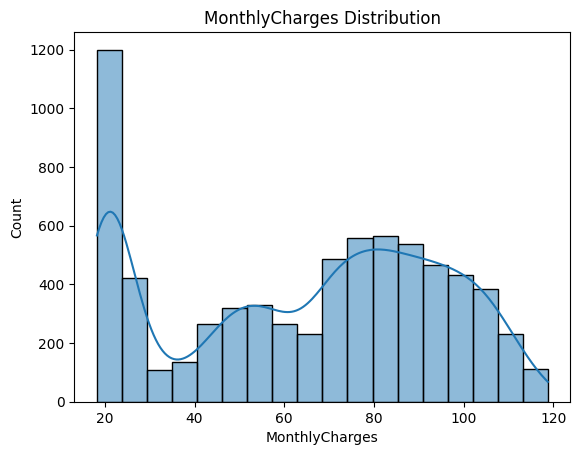

In [16]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("MonthlyCharges Distribution")
plt.show()

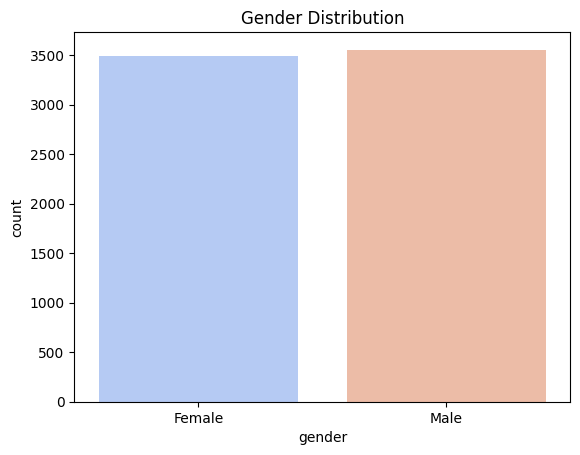

In [17]:
sns.countplot(x='gender', data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

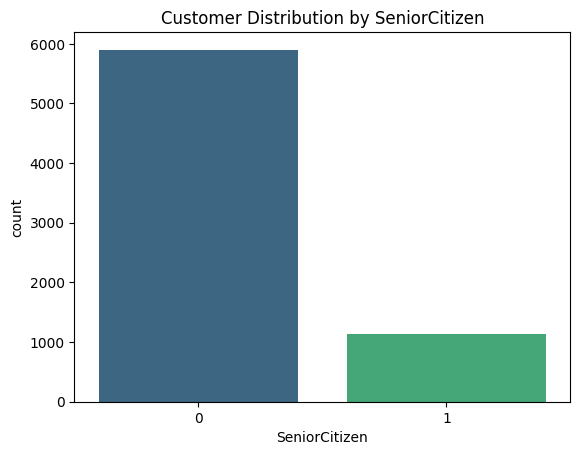

In [18]:
sns.countplot(x='SeniorCitizen', data=df,palette='viridis')
plt.title("Customer Distribution by SeniorCitizen")
plt.show()

In [19]:
fig2 = px.histogram(df, x="tenure")
fig2.show()

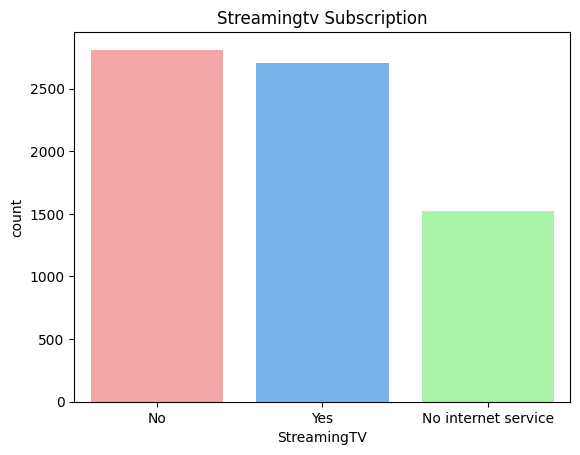

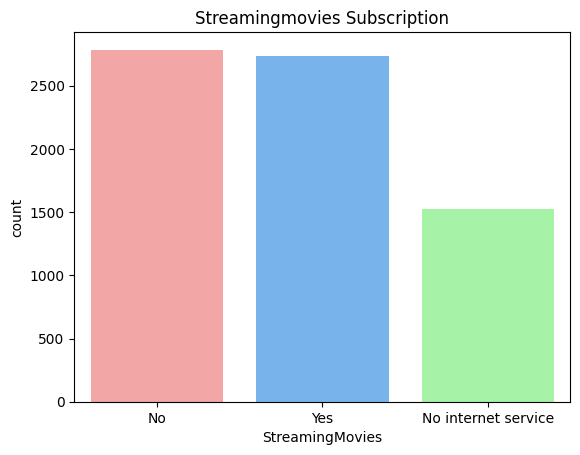

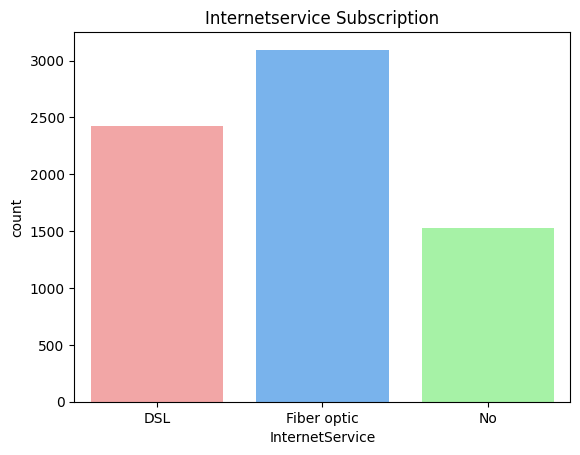

In [20]:
services = ["StreamingTV","StreamingMovies","InternetService"]
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
for service in services:
    sns.countplot(x=service, data=df,palette=custom_palette)
    plt.title(f"{service.capitalize()} Subscription")
    plt.show()

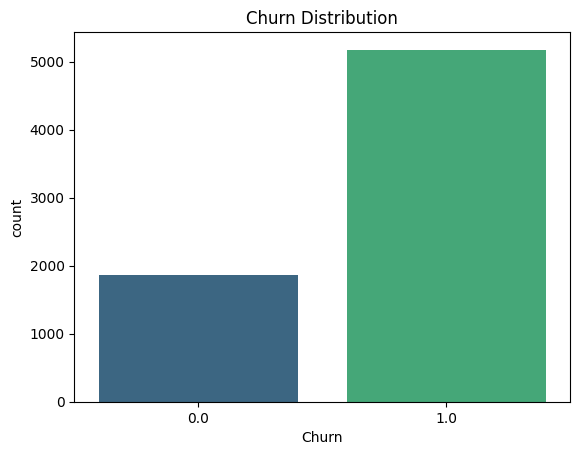

In [21]:
sns.countplot(x='Churn', data=df,palette='viridis')
plt.title("Churn Distribution")
plt.show()

In [22]:
fig3 = px.histogram(df, x='Contract',color='Contract')
fig3.show()

In [23]:
fig = px.bar(df,x="gender",color="StreamingMovies",color_discrete_sequence=custom_palette, barmode="group")
fig.show()

In [24]:
fig = px.bar(df,x="gender",color="TechSupport",  color_discrete_sequence=custom_palette, barmode="group")
fig.show()

Feature Engineering

In [25]:
#customer tenure:
print(df['tenure'].max())
df["Tenure_groups"]=pd.cut(df["tenure"],bins=[0,6,24,45,72],labels=["New","Regular","Loyal","Very_loyal"])

72


In [26]:
#customer tenure
df["Tenure_in_years"]=df["tenure"]/12

In [27]:
#customer charges
df['Total_Charges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["Avg_years spending"]=df["Total_Charges"]/df["Tenure_in_years"]
df["Avg_monthly_spend"]=df["MonthlyCharges"]/df['tenure']


In [28]:
tenure_counts = df["Tenure_groups"].value_counts()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_groups,Tenure_in_years,Total_Charges,Avg_years spending,Avg_monthly_spend
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,1.0,New,0.083333,29.85,358.200000,29.850
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.5,1.0,Loyal,2.833333,1889.50,666.882353,1.675
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,0.0,New,0.166667,108.15,648.900000,26.925
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,1.0,Loyal,3.750000,1840.75,490.866667,0.940
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,0.0,New,0.166667,151.65,909.900000,35.350


In [29]:
group_new=df[df["Tenure_groups"]=="New"]["Churn"].astype("category").cat.codes
group_regular=df[df["Tenure_groups"]=="Regular"]["Churn"].astype("category").cat.codes
group_loyal=df[df["Tenure_groups"]=="Loyal"]["Churn"].astype("category").cat.codes
group_very_loyal=df[df["Tenure_groups"]=="Very_loyal"]["Churn"].astype("category").cat.codes
## Anova_test
f_stat,p_value=f_oneway(group_new,group_regular,group_loyal,group_very_loyal)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

## dividing the data acoorint to the contract
group_monthly = df[df["Contract"] == "Month-to-month"]["Churn"]
group_one_year = df[df["Contract"] == "One year"]["Churn"]
group_two_year = df[df["Contract"] == "Two year"]["Churn"]

## Anova test
f_stat, p_value = f_oneway(group_monthly, group_one_year, group_two_year)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 354.0924363661728, P-value: 3.7009311060530626e-214
F-statistic: 711.7604625631104, P-value: 2.9921663019905003e-282


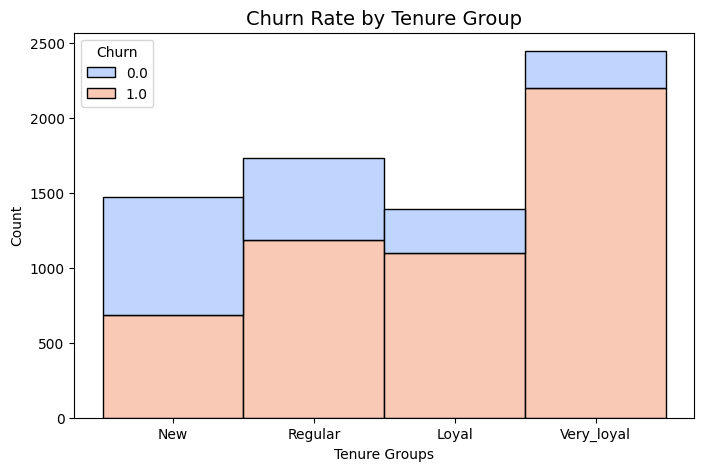

In [30]:
plt.figure(figsize=(8, 5))
df["Churn"].astype(int)
sns.histplot(x=df["Tenure_groups"], hue=df["Churn"], multiple="stack", palette="coolwarm")
plt.title("Churn Rate by Tenure Group", fontsize=14)
plt.xlabel("Tenure Groups")
plt.ylabel("Count")
plt.show()


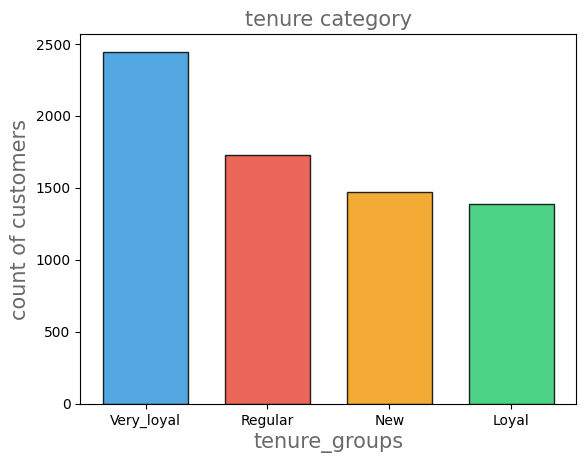

In [31]:
plt.bar(tenure_counts.index,height=tenure_counts.values,color=["#3498db", "#e74c3c", "#f39c12", "#2ecc71", "#9b59b6"], alpha=0.85,width=0.7,edgecolor="black")
plt.title("tenure category",size="15",color="dimgray")
plt.xlabel("tenure_groups",color="dimgray",size="15")
plt.ylabel("count of customers",color="dimgray",size="15")
plt.show()

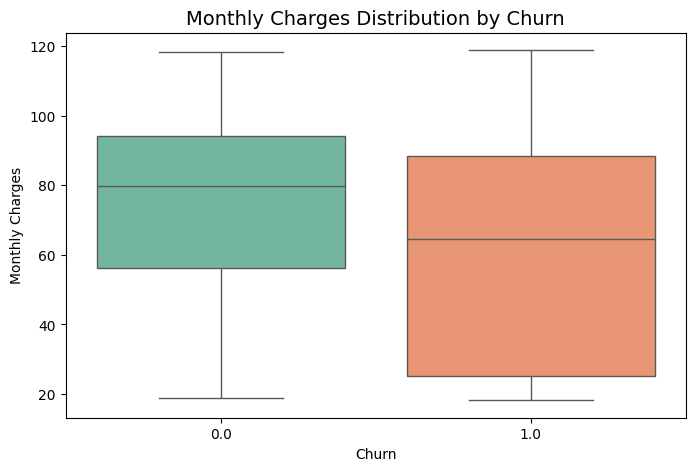

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Monthly Charges Distribution by Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


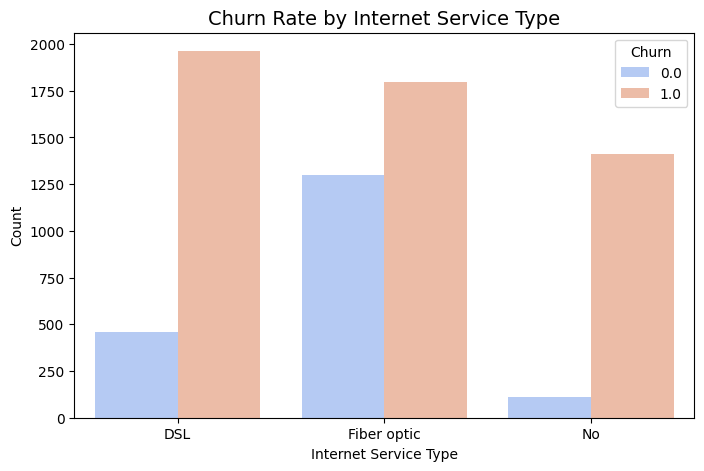

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="coolwarm")
plt.title("Churn Rate by Internet Service Type", fontsize=14)
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()


Text(0.5, 0, 'tech support groups')

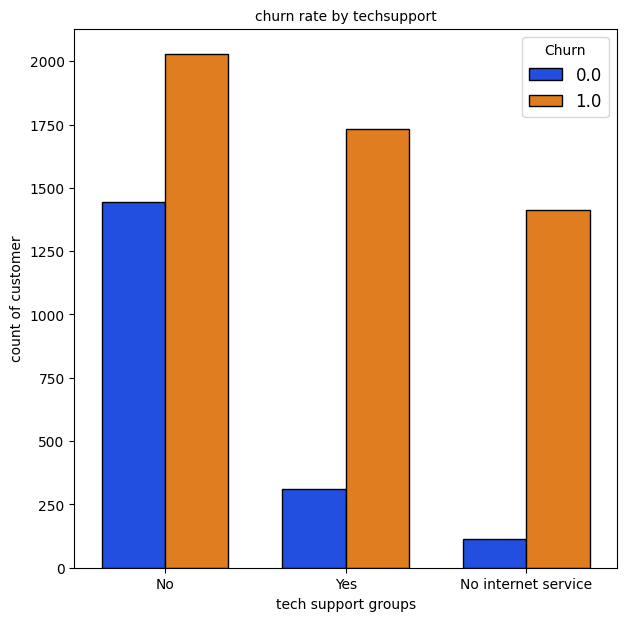

In [54]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x="TechSupport", hue="Churn",palette="bright",edgecolor="black",width=0.7)
plt.legend(fontsize=12,title="Churn",title_fontsize=10)
plt.title("churn rate by techsupport",size=10)
plt.ylabel("count of customer",size=10)
plt.xlabel("tech support groups",size=10)



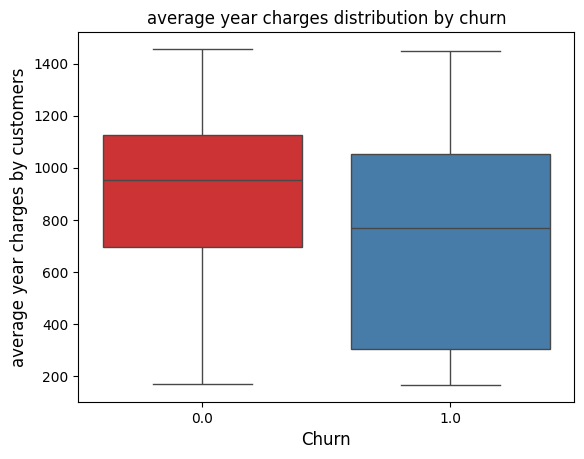

In [35]:
sns.boxplot(x="Churn" ,y="Avg_years spending",data=df,palette="Set1")
plt.title("average year charges distribution by churn")
plt.xlabel("Churn",size=12)
plt.ylabel("average year charges by customers",size=12)
plt.show()

Text(0.5, 1.0, 'Distribution by Payment_methods')

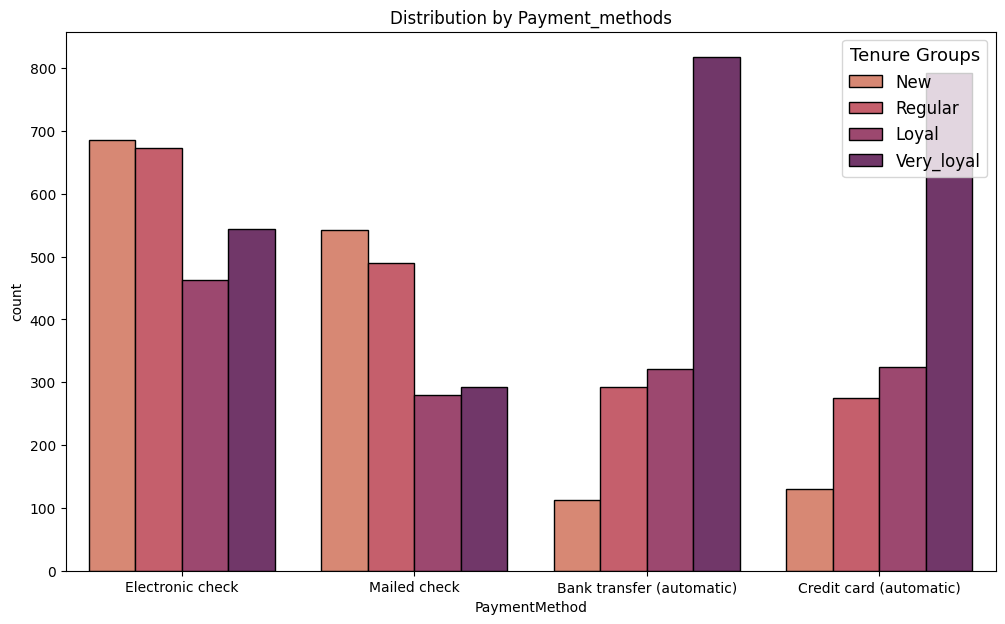

In [55]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="PaymentMethod",hue="Tenure_groups",palette="flare",edgecolor="black")
plt.legend(title="Tenure Groups", fontsize=12, title_fontsize=13, loc="upper right")
plt.title("Distribution by Payment_methods")